In [1]:
import cv2
import math
import numpy as np

import segmentationtools as st

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


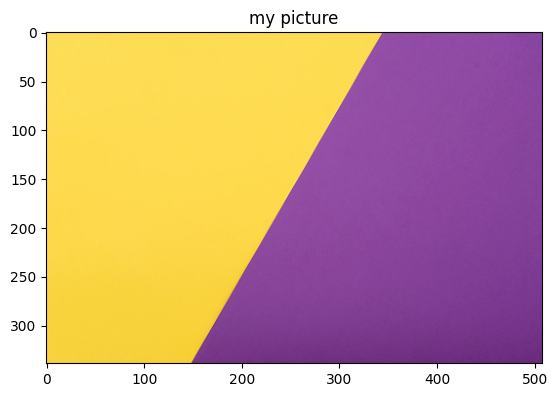

In [2]:
# Import sourse image
img = cv2.imread("localfiles/2colortexture.jpg")

st.show_img(img)

## Houghlines

[[[298.          0.5235988]]]


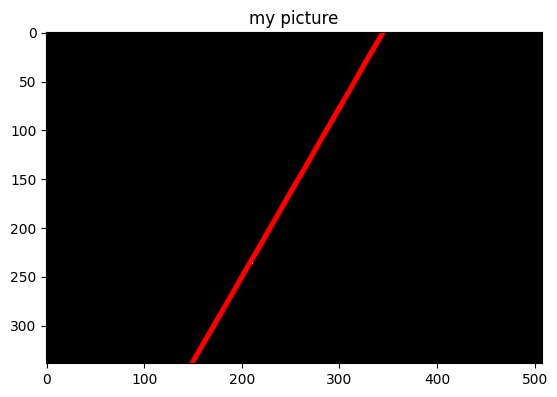

In [6]:
dst = cv2.Canny(img, 50, 200, None, 3)
dstp = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

# Lets apply Standard HoughLine transform to detect lines
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
print(lines)
# Below we will display the result by drawing lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(dstp, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

st.show_img(dstp)


### Line Function

In [15]:
def get_point_on_polar_line(line, x = None,y = None):
    rho = line[0][0]
    theta = line[0][1]
    cost = math.cos(theta)
    sint = math.sin(theta)
    a = -cost/sint
    b = rho/sint

    if(x is not None):
        return a * x + b
    elif(y is not None):
        return (y - b) / a
    else:
        return None

def get_edge_points(line, xMax, yMax):

    points = []

    # check the min x value
    y0 = get_point_on_polar_line(line, x = 0)
    if(y0 > 0 and y0 < yMax):
        points.append(np.array([0,y0]))

    # check the max x value
    y1 = get_point_on_polar_line(line, x = xMax)
    if(y1 > 0 and y1 < yMax):
        points.append(np.array([xMax,y1]))

    # check the min y value
    x0 = get_point_on_polar_line(line, y = 0)
    if(x0 > 0 and x0 < xMax):
        points.append(np.array([x0,0]))

    # check the max y value
    x1 = get_point_on_polar_line(line, y = yMax)
    if(x1 > 0 and x1 < xMax):
        points.append(np.array([x1,yMax]))

    return np.array(points)


### Get the points at the edges

In [16]:
# We are looking for the intersection between the parametric line and the edges of the image, 
# to do this we need to evaluate the line at the edge values 


points = get_edge_points(lines[0], img.shape[1], img.shape[0])

print(points)



[[344.10076333   0.        ]
 [148.37901549 339.        ]]
